In [1]:
import os
import re
import pandas as pd
from scipy.io import loadmat

base_path = r"C:\Users\shade\OneDrive\Documents\GitHub\Neurociencias-2026-1\Mat_proyecto"
mat_folder = os.path.join(base_path, "mat")   # <--- RUTA CORRECTA

metadata_path = os.path.join(base_path, "metadata.csv")
df_meta = pd.read_csv(metadata_path, sep=";")

cols = ['ID', 'Gender', 'Language', '% SP', '% BQ', 'Age (days)']
df_meta = df_meta[cols]

df_meta['% SP'] = df_meta['% SP'].astype(str).str.replace(",", ".").astype(float)
df_meta['% BQ'] = df_meta['% BQ'].astype(str).str.replace(",", ".").astype(float)

archivos = []
for fname in os.listdir(mat_folder):
    if fname.endswith("_preprocessed.mat"):
        match = re.search(r"SL_(\d+)_", fname)
        if match:
            ID = int(match.group(1))
            archivos.append({"file": fname, "ID": ID})

df_files = pd.DataFrame(archivos)


# 6. UNIR METADATA + LISTA DE ARCHIVOS
df_merged = pd.merge(df_files, df_meta, on="ID", how="inner")

print("ARCHIVOS ENCONTRADOS + METADATA UNIDA:\n")
print(df_merged)


ARCHIVOS ENCONTRADOS + METADATA UNIDA:

                            file    ID  Gender  Language   % SP   % BQ  \
0   RS4_SL_4216_preprocessed.mat  4216       1         2  100.0    0.0   
1   RS4_SL_4219_preprocessed.mat  4219       1         1   25.0   75.0   
2   RS4_SL_4223_preprocessed.mat  4223       1         3    0.0  100.0   
3   RS4_SL_4229_preprocessed.mat  4229       2         2  100.0    0.0   
4   RS4_SL_4231_preprocessed.mat  4231       1         2   98.9    1.1   
..                           ...   ...     ...       ...    ...    ...   
94  RS4_SL_4617_preprocessed.mat  4617       1         3    8.5   91.5   
95  RS4_SL_4618_preprocessed.mat  4618       1         2  100.0    0.0   
96  RS4_SL_4641_preprocessed.mat  4641       1         3    7.3   92.7   
97  RS4_SL_4653_preprocessed.mat  4653       1         3    0.0  100.0   
98  RS4_SL_4674_preprocessed.mat  4674       2         3    0.0  100.0   

    Age (days)  
0          120  
1          128  
2          126  
3  

In [2]:
from scipy.io import loadmat
import numpy as np

def cargar_clean_data(path_mat):
    data = loadmat(path_mat, squeeze_me=True, struct_as_record=False)
    rs = data['rsData']
    clean = rs.clean_data  
    return clean


In [3]:
df_merged = df_files.merge(df_meta, on='ID', how='left')
folder_path = base_path

In [4]:
mapping = {
    1: "Bilingual",
    2: "Spanish-monolingual",
    3: "Basque-monolingual"
}

df_meta["Group"] = df_meta["Language"].map(mapping)

In [37]:

df_sampled = (
    df_meta
    .groupby("Group", group_keys=False)
    .apply(lambda x: x)
)



print(df_sampled)


       ID  Gender  Language   % SP   % BQ  Age (days)                Group
0    4216       1         2  100.0    0.0         120  Spanish-monolingual
1    4219       1         1   25.0   75.0         128            Bilingual
2    4223       1         3    0.0  100.0         126   Basque-monolingual
3    4229       2         2  100.0    0.0         126  Spanish-monolingual
4    4231       1         2   98.9    1.1         125  Spanish-monolingual
..    ...     ...       ...    ...    ...         ...                  ...
99   4310       2         1   32.8   67.2         123            Bilingual
100  4348       2         1   52.8   47.2         125            Bilingual
101  4350       2         2  100.0    0.0         123  Spanish-monolingual
102  4550       2         3    0.0  100.0         121   Basque-monolingual
103  4637       1         3    0.0  100.0         127   Basque-monolingual

[104 rows x 7 columns]


C:\Users\shade\AppData\Local\Temp\ipykernel_8820\778393955.py:5: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x)


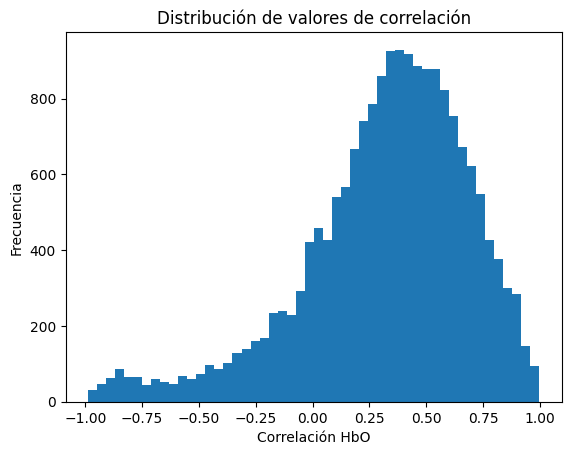

50th percentile: 0.373
60th percentile: 0.453
70th percentile: 0.536
75th percentile: 0.578
80th percentile: 0.628
90th percentile: 0.741
Umbral sugerido (75th percentile): 0.578


In [38]:
import numpy as np

# 1️extraer todos los valores de correlación (sin diagonal)
all_corr_values = []
for r in resultados:
    df = r['corr_df'].values
    # np.triu_indices excluye la diagonal (k=1)
    vals = df[np.triu_indices(df.shape[0], k=1)]
    all_corr_values.extend(vals)

all_corr_values = np.array(all_corr_values)

# 2️ Ver distribución
import matplotlib.pyplot as plt
plt.hist(all_corr_values, bins=50)
plt.xlabel("Correlación HbO")
plt.ylabel("Frecuencia")
plt.title("Distribución de valores de correlación")
plt.show()

# 3️ Calcular percentiles
percentiles = [50, 60, 70, 75, 80, 90]
for p in percentiles:
    print(f"{p}th percentile: {np.percentile(all_corr_values, p):.3f}")

# 4️ Elegir umbral según percentil deseado (ejemplo 75%)
th_percentil = np.percentile(all_corr_values, 75)
print(f"Umbral sugerido (75th percentile): {th_percentil:.3f}")


Procesado ID 4216 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4219 (Group Bilingual), matriz (52, 52)
Procesado ID 4223 (Group Basque-monolingual), matriz (52, 52)
Procesado ID 4229 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4231 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4237 (Group Basque-monolingual), matriz (52, 52)
Procesado ID 4252 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4260 (Group Basque-monolingual), matriz (52, 52)
Procesado ID 4269 (Group Bilingual), matriz (52, 52)
Procesado ID 4275 (Group Basque-monolingual), matriz (52, 52)
Procesado ID 4278 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4279 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4280 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4283 (Group Bilingual), matriz (52, 52)
Procesado ID 4291 (Group Basque-monolingual), matriz (52, 52)
Procesado ID 4295 (Group Spanish-monolingual), matriz (52, 52)
Procesado ID 4296 (Group Bi

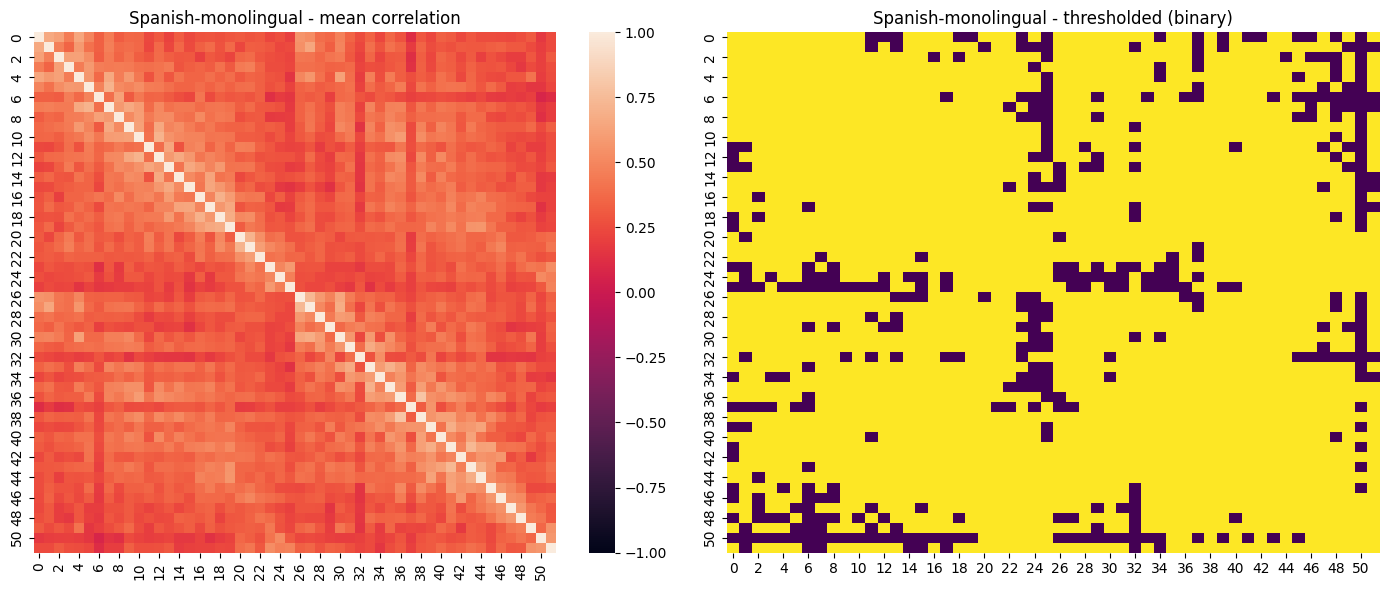


--- Grupo: Bilingual | sujetos procesados: 36 ---


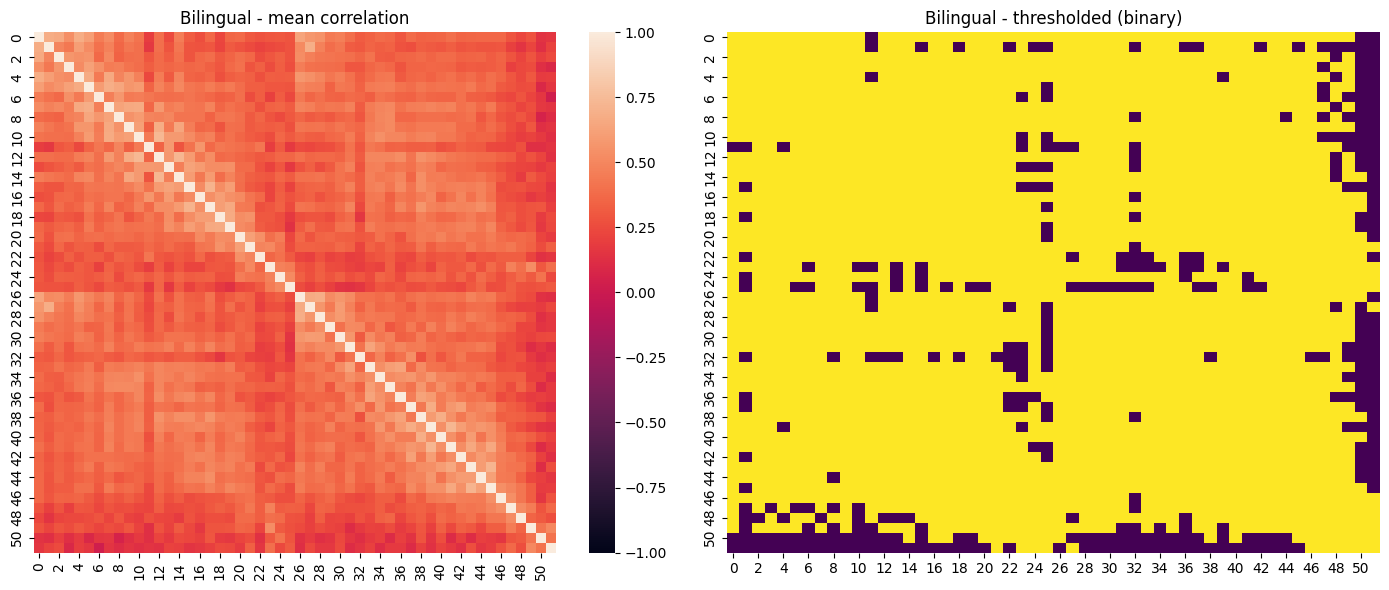


--- Grupo: Basque-monolingual | sujetos procesados: 33 ---


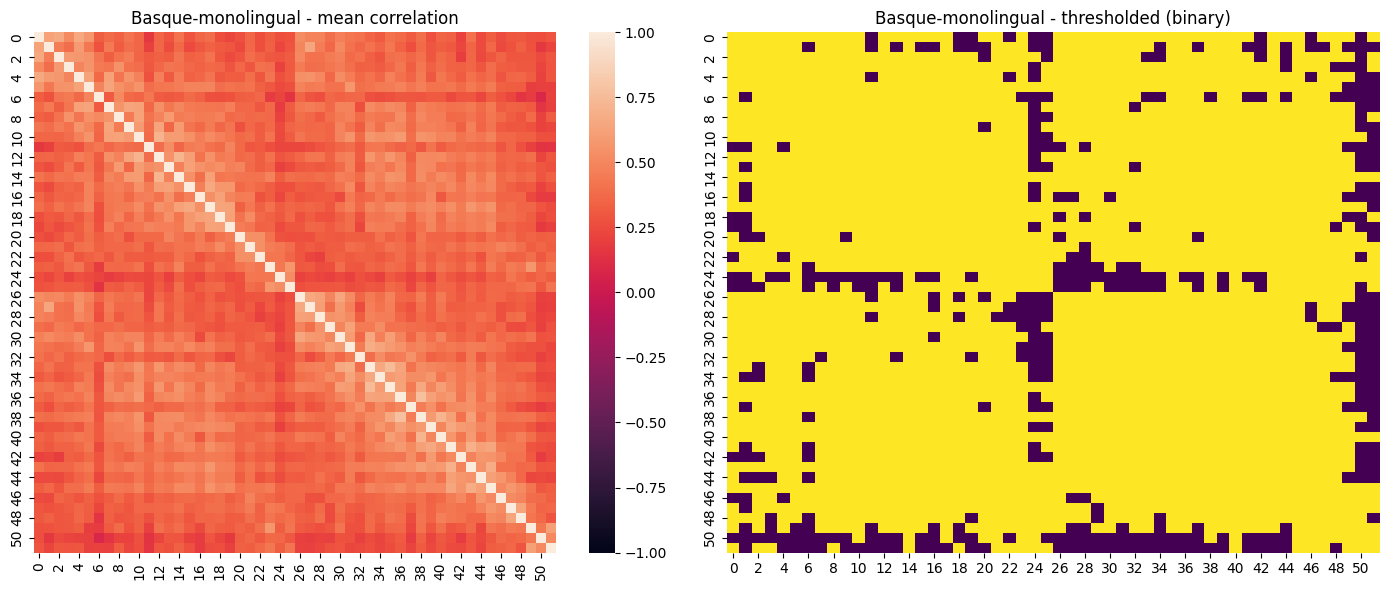


¡Listo! Matrices individuales calculadas y heatmaps generados.


In [104]:
#  correlaciones por sujeto + + stack + heatmaps
import os, re
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt
import seaborn as sns
base_path = r"C:\Users\shade\OneDrive\Documents\GitHub\Neurociencias-2026-1\Mat_proyecto"
folder_path = os.path.join(base_path, "mat") 
def load_mat_rsdata(path_mat):
    """Carga rsData del .mat y devuelve rs (estructura).
       Usa squeeze_me para simplificar arrays anidados."""
    mat = sio.loadmat(path_mat, squeeze_me=True, struct_as_record=False)
    rs = mat.get('rsData')
    if rs is None:
        raise ValueError(f"No se encontró 'rsData' en {path_mat}")
    # si rs viene como array 1x1 (struct), obtener el struct interno
    if isinstance(rs, np.ndarray) and rs.size == 1:
        rs = rs[0]
    return rs

def extract_hbo_from_rs(rs):
    """
    Intentos ordenados para extraer HbO (resultado: array channels x samples).
    - Primero intenta rs.clean_data si contiene 'oxy'/'deoxy' o campos 'oxy' dentro.
    - Luego intenta rs.conc (shape esperada 5000 x 3 x 52 -> podemos tomar conc[:,:,] -> OXY index 0 or 0/1)
    - Luego intenta rs.filt o rs.wav (ambos shape 5000 x 104 normalmente).
    Se devuelve array (n_channels, n_samples).
    """
    try:
        clean = getattr(rs, 'clean_data', None)
        if clean is not None:
            # clean puede ser (1,2) struct; intentamos navegar
            # si es numpy structured array con fields 'oxy'/'deoxy'
            if hasattr(clean, 'dtype') and clean.dtype.names is not None:
                
                if 'oxy' in clean.dtype.names:
                    oxy = clean['oxy']
                    # oxy puede ser nested: tratar de extraer array de forma (n_samples, n_channels) o (n_samples, n_rois)
                    if isinstance(oxy, np.ndarray):
                    
                        if oxy.size == 1 and isinstance(oxy[0], np.ndarray):
                            oxy_m = oxy[0]
                        else:
                            oxy_m = oxy
                        # queremos (channels, samples)
                        if oxy_m.ndim == 2:
                            # convertir a (channels, samples)
                            if oxy_m.shape[0] <= oxy_m.shape[1]:
                                # si es (n_samples, n_channels) convertimos
                                if oxy_m.shape[0] > oxy_m.shape[1]:
                                    pass
                                # assume (n_samples, n_channels)
                                return oxy_m.T.copy()
                            else:
                                return oxy_m.copy()
                # si no encontramos oxy en clean, intentar si clean contiene arrays directos
            # Si clean es un ndarray 1x2 con objetos, intentar extraer elementos numéricos
            # (p.ej. clean could be array([[5622,11289]]) => estos son índices, no señales -> ignorar)
    except Exception:
        pass

    try:
        conc = getattr(rs, 'conc', None)
        if conc is not None:
            
            conc_arr = np.array(conc)
            if conc_arr.ndim == 3:
                # probar si index 0 tiene rango razonable (oxy)
                cand = conc_arr[:, 0, :]  # (samples, channels)
                # devolver (channels, samples)
                return cand.T.copy()
    except Exception:
        pass

    # 3) filt (5000 x 104) o wav (5000 x 104) -> devolver como channels x samples (104 channels)
    for attr in ('filt', 'wav', 'OD', 'ODorigOrder'):
        try:
            arr = getattr(rs, attr, None)
            if arr is None:
                continue
            arr = np.array(arr)
            # algunos pueden ser transpuestos: intentar inferir orientation
            if arr.ndim == 2:
                # si shape (samples, channels) (5000,104) -> devolver (channels, samples)
                if arr.shape[0] >= arr.shape[1]:
                    # assume (samples, channels)
                    return arr.T.copy()
                else:
                    return arr.copy()
        except Exception:
            pass

    # 4) GSR_oxy o GSR_deoxy (5000 x 46) - fallback (fewer channels)
    for attr in ('GSR_oxy', 'GSR_deoxy'):
        try:
            arr = getattr(rs, attr, None)
            if arr is not None:
                arr = np.array(arr)
                if arr.ndim == 2:
                    return arr.T.copy()
        except Exception:
            pass

    raise ValueError("No pude extraer HbO")

def matriz_correlacion_hb(data_hbo):
    """
    data_hbo: np.array channels x samples
    devuelve: DataFrame correlación (channels x channels)
    """
    # comprobaciones
    if data_hbo.ndim != 2:
        raise ValueError("data_hbo debe ser 2D (channels x samples).")
    # Si hay NaNs, remplazar por 0 o eliminar series con NaNs; aquí imputamos con nanmean per channel
    if np.isnan(data_hbo).any():
        # rellenar con la media del canal
        nan_mask = np.isnan(data_hbo)
        means = np.nanmean(data_hbo, axis=1)
        inds = np.where(nan_mask)
        for r, c in zip(*inds):
            data_hbo[r, c] = means[r]
    # calcular correlación entre filas (canales)
    corr = np.corrcoef(data_hbo)
    # envolver en DataFrame con índices 0..n-1 (puedes poner nombres si tienes map)
    n = corr.shape[0]
    return pd.DataFrame(corr, index=range(n), columns=range(n))

#procesar muestra
def procesar_muestra(df_sampled, folder_path):
    resultados = []   # lista de dicts: {'ID', 'Group','Gender','corr_df'}
    for _, row in df_sampled.iterrows():
        bebé_id = int(row['ID'])
        archivo = row.get('file', None)
        if archivo is None:
            # intentar reconstruir path
            archivo = os.path.join(folder_path, f"RS4_SL_{bebé_id}_preprocessed.mat")
        # asegurar ruta absoluta
        if not os.path.isabs(archivo):
            archivo = os.path.join(folder_path, archivo)
        if not os.path.exists(archivo):
            print(f" No se encontró archivo .mat para ID {bebé_id} en {archivo}")
            continue
        try:
            rs = load_mat_rsdata(archivo)
            hb = extract_hbo_from_rs(rs)   # channels x samples
            corr_df = matriz_correlacion_hb(hb)
            resultados.append({
                'ID': bebé_id,
                'Group': row['Group'],
                'Gender': row['Gender'],
                'corr_df': corr_df
            })
            print(f"Procesado ID {bebé_id} (Group {row['Group']}), matriz {corr_df.shape}")
        except Exception as e:
            print(f"Error procesando ID {bebé_id}: {e}")
    return resultados

def stack_threshold(lista_dfs, th, porcentaje):
    """
    lista_dfs: lista de pd.DataFrame (todas mismas dimensiones y etiquetas)
    th: umbral (float) aplicado a los valores de correlación; comparacion > th
    porcentaje: fracción entre 0 y 1 que indica el porcentaje mínimo de sujetos
               que deben pasar el umbral para mantener la conexión
    devuelve: DataFrame binario (0/1) de la misma forma
    """
    if len(lista_dfs) == 0:
        raise ValueError("La lista de dataframes está vacía.")
    # convertir a arrays
    arrs = [df.values for df in lista_dfs]
    stack = np.stack(arrs, axis=0)   # (N, n, n)
    above = stack > th
    N = stack.shape[0]
    count_above = above.sum(axis=0)  # (n,n)
    min_requerido = int(np.ceil(porcentaje * N))
    result_bool = count_above >= min_requerido
    result_df = pd.DataFrame(result_bool.astype(int),
                             index=lista_dfs[0].index,
                             columns=lista_dfs[0].columns)
    return result_df

def plot_group_heatmaps(lista_dfs, result_binary_df, title_prefix):
    # promedio
    mean_mat = sum([df.values for df in lista_dfs]) / len(lista_dfs)
    fig, axs = plt.subplots(1, 2, figsize=(14,6))
    sns.heatmap(mean_mat, ax=axs[0], vmin=-1, vmax=1)
    axs[0].set_title(f"{title_prefix} - mean correlation")
    sns.heatmap(result_binary_df.values, ax=axs[1], cmap='viridis', cbar=False)
    axs[1].set_title(f"{title_prefix} - thresholded (binary)")
    plt.tight_layout()
    plt.show()

try:
    df_sampled
except NameError:
    raise NameError("df_sampled no existe. Crea df_sampled con 5 sujetos por grupo (ID, Group, Gender, file).")

# Procesar la muestra
resultados = procesar_muestra(df_sampled, folder_path)

# Organizar por grupo
from collections import defaultdict
grupos = defaultdict(list)
for rec in resultados:
    grupos[rec['Group']].append(rec['corr_df'])

# Ejemplo de parámetros de umbral (ajusta según quieras)
th = 0.3         # umbral de correlación (ejemplo)
porcentaje = 0.5   # conservar conexión si >=60% de sujetos la tienen por encima de th

# Para cada grupo: apilar, umbralizar y plotear
for grupo_name, lista_corr in grupos.items():
    if len(lista_corr) == 0:
        print(f"Grupo {grupo_name} sin matrices procesadas.")
        continue
    print(f"\n--- Grupo: {grupo_name} | sujetos procesados: {len(lista_corr)} ---")
    # asegurarse que sean DataFrames
    lista_corr_dfs = [df if isinstance(df, pd.DataFrame) else pd.DataFrame(df) for df in lista_corr]
    # stack + threshold
    bin_df = stack_threshold(lista_corr_dfs, th, porcentaje)
    # plot
    plot_group_heatmaps(lista_corr_dfs, bin_df, title_prefix=grupo_name)
    # guardar resultados opcionalmente
    bin_df.to_csv(os.path.join(base_path, f"thresholded_{grupo_name.replace(' ', '_')}.csv"), index=True)
    # guardar matriz promedio
    mean_mat = sum([df.values for df in lista_corr_dfs]) / len(lista_corr_dfs)
    np.save(os.path.join(base_path, f"mean_corr_{grupo_name.replace(' ', '_')}.npy"), mean_mat)

print("\n¡Listo! Matrices individuales calculadas y heatmaps generados.")


In [8]:
# Mostrar matriz de correlación de un bebé específico
#bebé_idx = 0  # cambiar a 1, 2, ... según quieras
#bebé = resultados[bebé_idx]

#print(f"Bebé ID: {bebé['ID']} | Grupo: {bebé['Group']} | Género: {bebé['Gender']}")
#print(bebé['corr_df'])


In [57]:
validos = [i for i, m in enumerate(lista_corr_dfs) if m is not None]


In [58]:
df_meta = df_meta.iloc[validos].reset_index(drop=True)
lista_corr_dfs = [lista_corr_dfs[i] for i in validos]


In [105]:

# Crear diccionario que guardará las matrices promedio
mean_corr = {}
df_meta = df_meta.reset_index(drop=True)


for grupo in df_meta["Group"].unique():
    idx = df_meta[df_meta["Group"] == grupo].index

    matrices = [lista_corr_dfs[i] for i in idx]

    # Convertir todas a numpy para sumar
    matrices_np = np.stack([m.values for m in matrices])
    
    # Promedio por grupo
    mean_matrix = matrices_np.mean(axis=0)

    # Restauramos DataFrame con mismos nombres de canales
    mean_corr[grupo] = pd.DataFrame(
        mean_matrix,
        columns=matrices[0].columns,
        index=matrices[0].index,
    )

# Los nombres resultantes:
mean_corr_Basque_monolingual   = mean_corr["Basque-monolingual"]
mean_corr_Bilingual            = mean_corr["Bilingual"]
mean_corr_Spanish_monolingual  = mean_corr["Spanish-monolingual"]


In [106]:
mean_corr_Basque_monolingual   
mean_corr_Bilingual           
mean_corr_Spanish_monolingual  


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.000000,0.588259,0.659255,0.524558,0.592199,0.557465,0.417606,0.307058,0.338242,0.499234,...,0.245251,0.369165,0.286169,0.275782,0.253022,0.292476,0.230093,0.271619,0.224768,0.312515
1,0.588259,1.000000,0.381890,0.372202,0.612450,0.406022,0.351400,0.469201,0.285991,0.374470,...,0.311116,0.351261,0.281946,0.367986,0.320966,0.311581,0.325264,0.300830,0.127622,0.217949
2,0.659255,0.381890,1.000000,0.475565,0.479400,0.429820,0.412258,0.106354,0.332460,0.489743,...,0.223275,0.381729,0.242823,0.312601,0.347248,0.339225,0.242668,0.331524,0.315803,0.342094
3,0.524558,0.372202,0.475565,1.000000,0.369586,0.496217,0.411396,0.316863,0.570959,0.317571,...,0.355755,0.282669,0.359486,0.388493,0.389621,0.445533,0.410497,0.324391,0.309254,0.396254
4,0.592199,0.612450,0.479400,0.369586,1.000000,0.566683,0.423342,0.585007,0.402085,0.448439,...,0.323210,0.312577,0.327418,0.345598,0.288350,0.350637,0.313585,0.283832,0.115817,0.274024
5,0.557465,0.406022,0.429820,0.496217,0.566683,1.000000,0.584144,0.538725,0.489196,0.453650,...,0.443380,0.348159,0.420242,0.390876,0.237705,0.281543,0.308812,0.113401,0.066724,0.081737
6,0.417606,0.351400,0.412258,0.411396,0.423342,0.584144,1.000000,0.319273,0.595263,0.450942,...,0.408957,0.284585,0.368072,0.304214,0.322064,0.235655,0.220898,0.072840,0.039713,0.126315
7,0.307058,0.469201,0.106354,0.316863,0.585007,0.538725,0.319273,1.000000,0.434304,0.531992,...,0.449866,0.364454,0.384473,0.409668,0.330771,0.332629,0.319529,0.226364,0.106705,0.126628
8,0.338242,0.285991,0.332460,0.570959,0.402085,0.489196,0.595263,0.434304,1.000000,0.390921,...,0.407832,0.317324,0.427495,0.404493,0.415337,0.382990,0.363512,0.293468,0.231107,0.342599
9,0.499234,0.374470,0.489743,0.317571,0.448439,0.453650,0.450942,0.531992,0.390921,1.000000,...,0.307321,0.428702,0.301513,0.319258,0.364506,0.315141,0.211028,0.234593,0.237400,0.166375



--- Procesando grupo: Spanish-monolingual ---
             th25      th50      th75  promedio  mu_sigma
min     -0.366105  0.254178  0.419308  0.157267  0.505958
max      0.413972  0.624148  0.764880  0.527460  0.853258
mediana  0.172253  0.387982  0.561253  0.345150  0.630061
media    0.149811  0.403468  0.573688  0.348717  0.649875


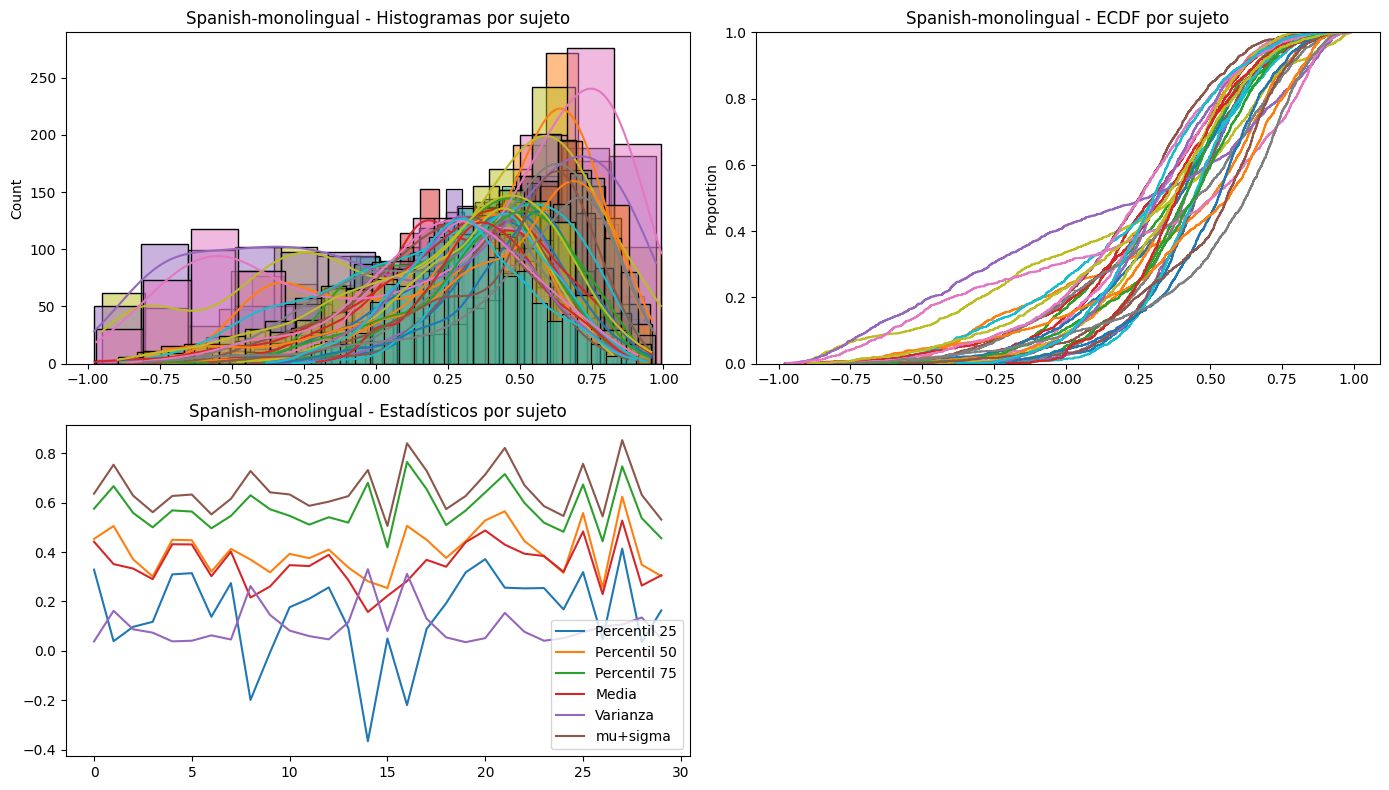


--- Procesando grupo: Bilingual ---
             th25      th50      th75  promedio  mu_sigma
min     -0.636400  0.213471  0.418548  0.168112  0.479907
max      0.556350  0.723084  0.859335  0.585761  0.961438
mediana  0.218710  0.415972  0.567477  0.391829  0.636013
media    0.188014  0.413652  0.578892  0.367364  0.652209


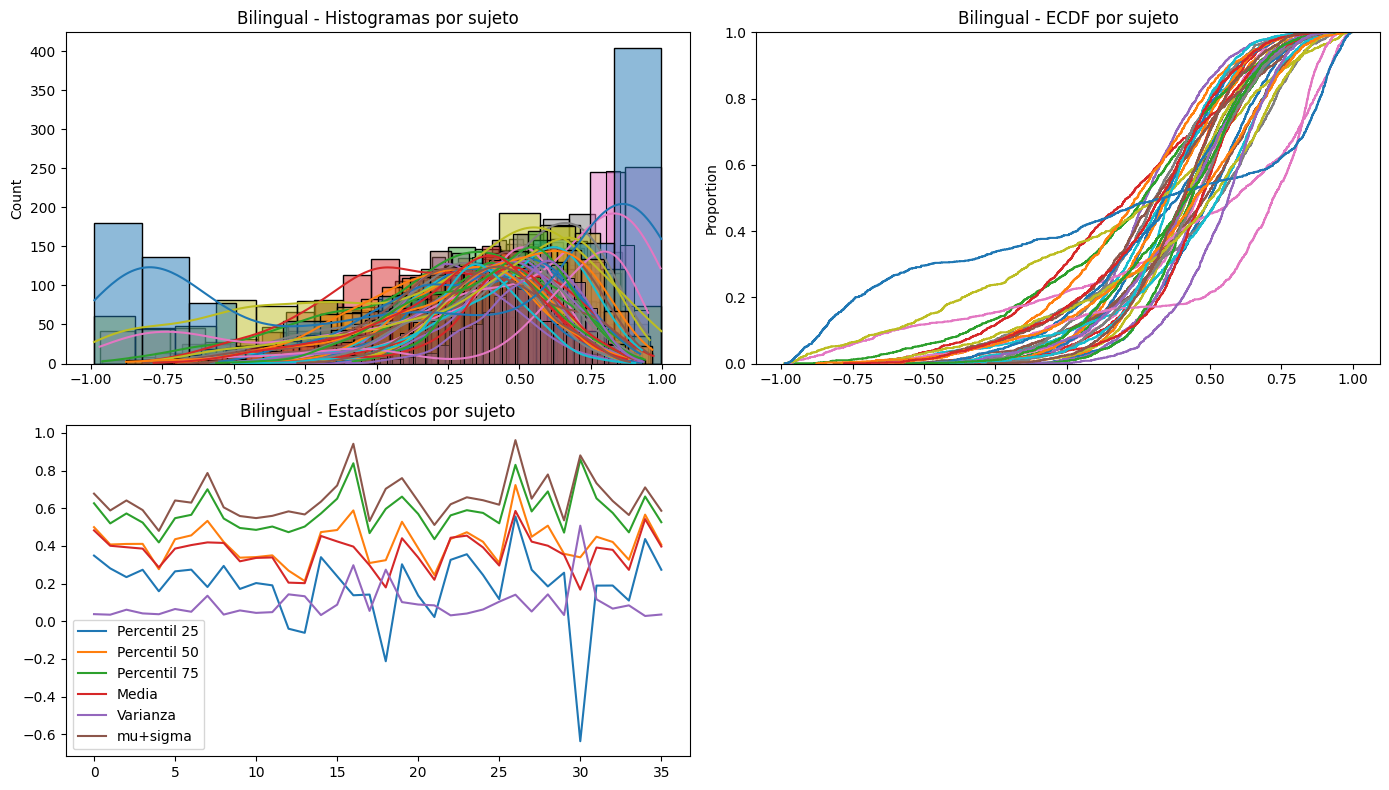


--- Procesando grupo: Basque-monolingual ---
             th25      th50      th75  promedio  mu_sigma
min     -0.050217  0.277508  0.430222  0.241526  0.500120
max      0.728380  0.842966  0.895199  0.702814  1.069318
mediana  0.223109  0.381595  0.556326  0.361421  0.623353
media    0.241233  0.420657  0.566455  0.387083  0.640179


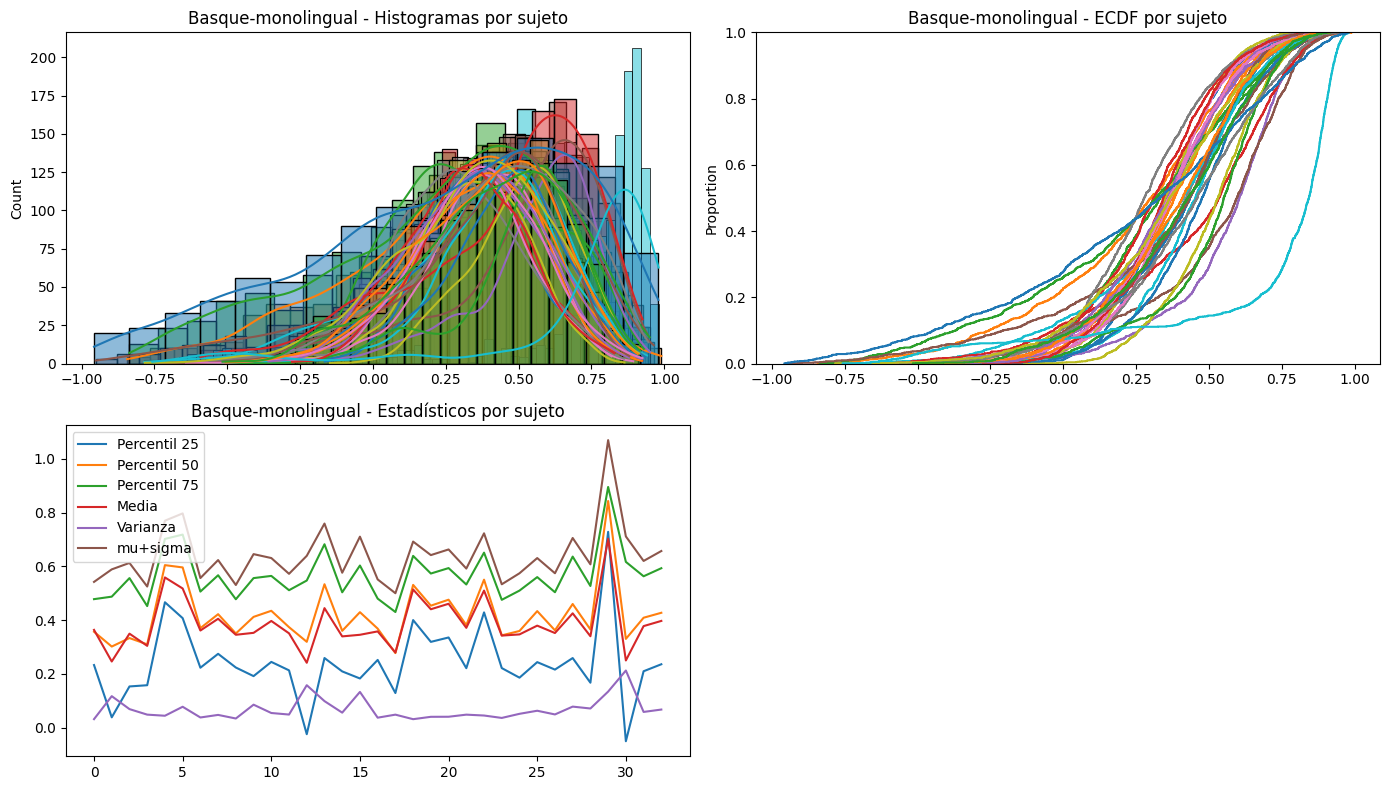

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


# 1️ Organizar matrices por grupo

grupos = defaultdict(list)
for r in resultados:  # resultados = lista de dicts con 'Group' y 'corr_df'
    grupos[r['Group']].append(r['corr_df'])


# 2️ Función para calcular estadísticos por sujeto

def estats(matrices):
    th25_list, th50_list, th75_list, promedio_list, varianza_list, mu_sigma_list = [], [], [], [], [], []
    for df in matrices:
        vals = df.values[np.triu_indices(df.shape[0], k=1)]  # solo valores fuera de diagonal
        th25_list.append(np.percentile(vals, 25))
        th50_list.append(np.percentile(vals, 50))
        th75_list.append(np.percentile(vals, 75))
        promedio_list.append(np.mean(vals))
        varianza_list.append(np.var(vals))
        mu_sigma_list.append(np.mean(vals) + np.std(vals))
    return th25_list, th50_list, th75_list, promedio_list, varianza_list, mu_sigma_list

# 3️ Función para crear DataFrame resumen
def estats_df(th25, th50, th75, promedio, mu_sigma):
    columnas=[th25, th50, th75, promedio, mu_sigma]
    estadisticos_df=pd.DataFrame(np.zeros((4,5)),
                                 columns=['th25','th50','th75','promedio','mu_sigma'],
                                 index=['min','max','mediana','media'])
    for i, col in enumerate(columnas):
        estadisticos_df.iloc[0,i] = np.min(col)
        estadisticos_df.iloc[1,i] = np.max(col)
        estadisticos_df.iloc[2,i] = np.median(col)
        estadisticos_df.iloc[3,i] = np.mean(col)
    return estadisticos_df

# 4️ Procesar todos los grupos

estadisticos_por_grupo = {}  # almacenar DataFrames resumen
umbral_por_grupo = {}        # almacenar umbral sugerido (percentil 75)
for grupo_name, lista_corr in grupos.items():
    if len(lista_corr) == 0:
        continue
    print(f"\n--- Procesando grupo: {grupo_name} ---")
    
    # 4a. Estadísticos
    th25, th50, th75, promedio, varianza, mu_sigma = estats(lista_corr)
    
    # 4b. Crear DataFrame resumen
    df_stats = estats_df(th25, th50, th75, promedio, mu_sigma)
    estadisticos_por_grupo[grupo_name] = df_stats
    print(df_stats)
    
    
    # 4d. Graficar histogramas y ECDF por sujeto
    fig, axes = plt.subplots(2,2, figsize=(14,8))
    axes[0][0].set_title(f"{grupo_name} - Histogramas por sujeto")
    axes[0][1].set_title(f"{grupo_name} - ECDF por sujeto")
    
    for sujeto in lista_corr:
        vals = sujeto.values[np.triu_indices(sujeto.shape[0], k=1)]
        sns.histplot(vals, ax=axes[0][0], kde=True)
        sns.ecdfplot(vals, ax=axes[0][1])
    
    # 4e. Graficar evolución de estadísticos por sujeto
    axes[1][0].plot(th25, label='Percentil 25')
    axes[1][0].plot(th50, label='Percentil 50')
    axes[1][0].plot(th75, label='Percentil 75')
    axes[1][0].plot(promedio, label='Media')
    axes[1][0].plot(varianza, label='Varianza')
    axes[1][0].plot(mu_sigma, label='mu+sigma')
    axes[1][0].set_title(f"{grupo_name} - Estadísticos por sujeto")
    axes[1][0].legend()
    
    # 4f. Limpiar subplot restante
    axes[1][1].axis('off')
    
    plt.tight_layout()
    plt.show()




In [21]:
# Coordenadas 2D aproximadas para 52 canales (basadas en 10-20)
coords_10_20 = {
    0: (-0.6, 1.0),   1: (-0.3, 1.0),   2: (0.0, 1.0),    3: (0.3, 1.0),    4: (0.6, 1.0),   # frontal extremo
    5: (-0.7, 0.8),   6: (-0.4, 0.8),   7: (-0.1, 0.8),   8: (0.1, 0.8),    9: (0.4, 0.8),   10: (0.7, 0.8), # frontal medio
    11: (-0.8, 0.5),  12: (-0.5, 0.5),  13: (-0.2, 0.5),  14: (0.2, 0.5),   15: (0.5, 0.5),  16: (0.8, 0.5), # frontal lateral
    17: (-0.9, 0.2),  18: (-0.6, 0.2),  19: (-0.3, 0.2),  20: (0.0, 0.2),   21: (0.3, 0.2),  22: (0.6, 0.2),  23: (0.9, 0.2), # central
    24: (-0.9, -0.2), 25: (-0.6, -0.2), 26: (-0.3, -0.2), 27: (0.0, -0.2),  28: (0.3, -0.2), 29: (0.6, -0.2), 30: (0.9, -0.2), # central posterior
    31: (-0.8, -0.5), 32: (-0.5, -0.5), 33: (-0.2, -0.5), 34: (0.2, -0.5),  35: (0.5, -0.5), 36: (0.8, -0.5), # parietal
    37: (-0.7, -0.8), 38: (-0.4, -0.8), 39: (-0.1, -0.8), 40: (0.1, -0.8),  41: (0.4, -0.8), 42: (0.7, -0.8), # temporal
    43: (-0.6, -1.0), 44: (-0.3, -1.0), 45: (0.0, -1.0),  46: (0.3, -1.0),   47: (0.6, -1.0), # occipital superior
    48: (-0.4, -1.1), 49: (-0.1, -1.1), 50: (0.1, -1.1),  51: (0.4, -1.1)   # occipital inferior
}



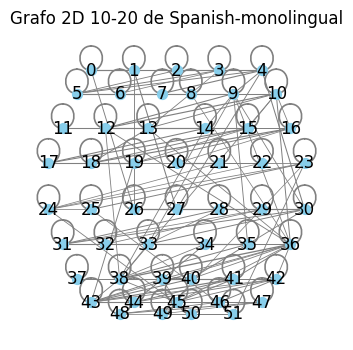

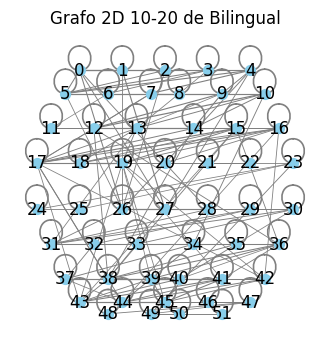

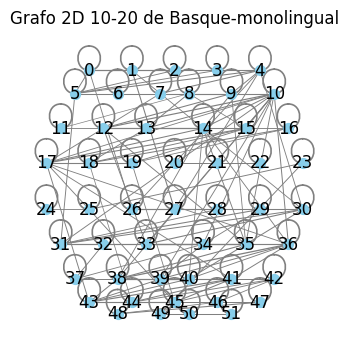

In [108]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_group_graph_10_20(bin_df, mean_mat=None, coords=None, group_name="Grupo"):
    """
    bin_df: DataFrame binario (1 = arista presente)
    mean_mat: matriz promedio (opcional) para ponderar aristas
    coords: diccionario {nodo_index: (x,y)}
    group_name: nombre del grupo para el título
    """
    G = nx.from_numpy_array(bin_df.values)
    
    # Si se pasa matriz promedio, usarla como peso
    if mean_mat is not None:
        for i, j in G.edges():
            G[i][j]['weight'] = mean_mat[i, j]
    
    # Layout usando coordenadas definidas
    if coords is not None:
        pos = coords
    else:
        pos = nx.spring_layout(G, seed=42)
    
    # Dibujar nodos y etiquetas
    plt.figure(figsize=(4,4))
    nx.draw_networkx_nodes(G, pos, node_color='skyblue', node_size=50)
    nx.draw_networkx_labels(G, pos)
    
    # Dibujar aristas
    if mean_mat is not None:
        edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=[w*1.2 for w in weights], edge_color='gray')
    else:
        nx.draw_networkx_edges(G, pos, width=1, edge_color='gray')
    
    plt.title(f"Grafo 2D 10-20 de {group_name}")
    plt.axis('off')
    plt.show()

for nombre_grupo, lista_corr in grupos.items():
    if len(lista_corr) == 0:
        continue
    
    bin_df = stack_threshold(lista_corr, th, porcentaje)
    mean_mat = sum([df.values for df in lista_corr]) / len(lista_corr)
    
    plot_group_graph_10_20(bin_df, mean_mat, coords=coords_10_20, group_name=nombre_grupo)


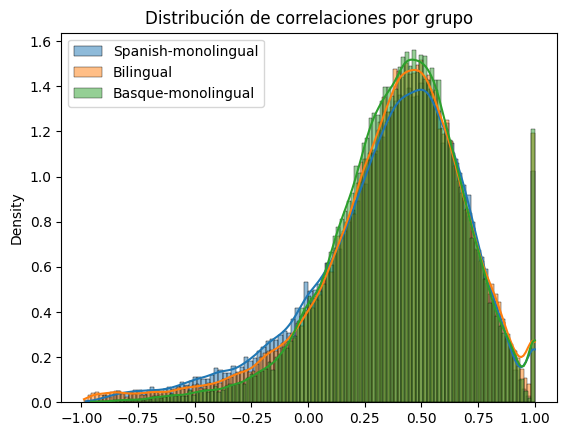

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

for group_name, lista_corr in grupos.items():
    all_values = np.concatenate([df.values.flatten() for df in lista_corr])
    sns.histplot(all_values, kde=True, label=group_name, stat='density')
plt.legend()
plt.title("Distribución de correlaciones por grupo")
plt.show()


In [121]:
def metricas_grafo(G):
    metricas = {}

  
    try:
        metricas["clustering"] = nx.average_clustering(G)
    except Exception:
        metricas["clustering"] = None

    try:
        if nx.is_connected(G):
            metricas["path_length"] = nx.average_shortest_path_length(G)
        else:
            metricas["path_length"] = None  # no intentamos conectar componentes
    except Exception:
        metricas["path_length"] = None


    try:
        metricas["degree"] = dict(G.degree())
    except Exception:
        metricas["degree"] = {}


    try:
        metricas["betweenness"] = nx.betweenness_centrality(G, normalized=True)
    except Exception:
        metricas["betweenness"] = {}

  
    try:
        metricas["closeness"] = nx.closeness_centrality(G)
    except Exception:
        metricas["closeness"] = {}

 
    try:
        # solo si usas alguna partición previa; si no, poner None
        metricas["modularity"] = None
    except Exception:
        metricas["modularity"] = None

 
    try:
        metricas["rich_club"] = nx.rich_club_coefficient(G, normalized=False)
    except Exception:
        metricas["rich_club"] = {}

    return metricas


In [122]:
resultados_metricas = {}

for nombre_grupo, lista_corr in grupos.items():

    if len(lista_corr) == 0:
        continue

    # Generar matriz binaria del grupo
    bin_df = stack_threshold(lista_corr, th, porcentaje)
    mean_mat = np.mean([df.values for df in lista_corr], axis=0)

    # Crear grafo binario
    G = nx.from_numpy_array(bin_df.values)

    # Añadir pesos 
    for i, j in G.edges():
        G[i][j]['weight'] = mean_mat[i, j]

    metrics = metricas_grafo(G)

    resultados_metricas[nombre_grupo] = metrics


In [131]:
pd.DataFrame(resultados_metricas)
# los resultados completos se pueden ver si se quita el dataframe

,Spanish-monolingual,Bilingual,Basque-monolingual
clustering,0.50716,0.530672,0.49012
path_length,3.323529,3.067119,None
degree,"{0: 7, 1: 6, 2: 6, 3: 7, 4: 10, 5: 9, 6: 5, 7:...","{0: 10, 1: 7, 2: 8, 3: 8, 4: 11, 5: 12, 6: 7, ...","{0: 8, 1: 6, 2: 6, 3: 6, 4: 12, 5: 10, 6: 4, 7..."
betweenness,"{0: 0.012350431703372881, 1: 0.001237812296635...","{0: 0.00867598958775429, 1: 0.0001960784313725...","{0: 0.00492370829069015, 1: 0.0010386215092097..."
closeness,"{0: 0.26424870466321243, 1: 0.2562814070351759...","{0: 0.281767955801105, 1: 0.2712765957446808, ...","{0: 0.2745098039215686, 1: 0.2506393861892583,..."
modularity,None,None,None
rich_club,{},{},{}


In [129]:
sorted(met["degree"].items(), key=lambda x: x[1], reverse=True)[:10]


[(36, 17),
 (38, 14),
 (9, 12),
 (10, 12),
 (39, 11),
 (43, 11),
 (45, 11),
 (4, 10),
 (8, 10),
 (13, 10)]

In [132]:
from matplotlib import colormaps
from networkx.algorithms import community

def grafo_nodirigido(matriz, ax, coords_10_20, thr):
    # Hacer copia segura
    A = matriz.copy()

    # Quitar diagonal
    np.fill_diagonal(A.to_numpy(), 0)

    # Threshold
    A[np.abs(A) < thr] = 0

    # Crear grafo NO dirigido
    G = nx.from_pandas_adjacency(A, create_using=nx.Graph)

    try:
        communities = community.greedy_modularity_communities(G)
        com_dict = {}
        for i, grupo in enumerate(communities):
            for nodo in grupo:
                com_dict[nodo] = i
        node_colors = [com_dict[n] for n in G.nodes()]
    except:
        # Si falla (p.ej. muy pocas conexiones)
        node_colors = "white"

    grados = dict(G.degree())
    node_sizes = [grados[n] * 20 for n in G.nodes()]
    hubs = sorted(grados, key=grados.get, reverse=True)[:1]

    node_linewidths = [2 if n in hubs else 1 for n in G.nodes()]
    node_edgecolors = ["gold" if n in hubs else "black" for n in G.nodes()]

   
    pesos = nx.get_edge_attributes(G, "weight")
    pesos_lista = list(pesos.values())

    cmap = colormaps.get_cmap("cool")
    edge_colors = [cmap((w + 1)/2) for w in pesos_lista]
    edge_widths = [abs(w) * 2 for w in pesos_lista]

    nx.draw_networkx_nodes(
        G, coords_10_20, ax=ax,
        node_size= node_sizes,
        node_color=node_colors,
        cmap="cool",
        linewidths=node_linewidths,
        edgecolors=node_edgecolors,
    )

    nx.draw_networkx_edges(
        G, coords_10_20,
        ax=ax,
        edge_color=edge_colors,
        width=edge_widths,
        alpha=0.7
    )

    nx.draw_networkx_labels(G, coords_10_20, ax=ax, font_size=10)


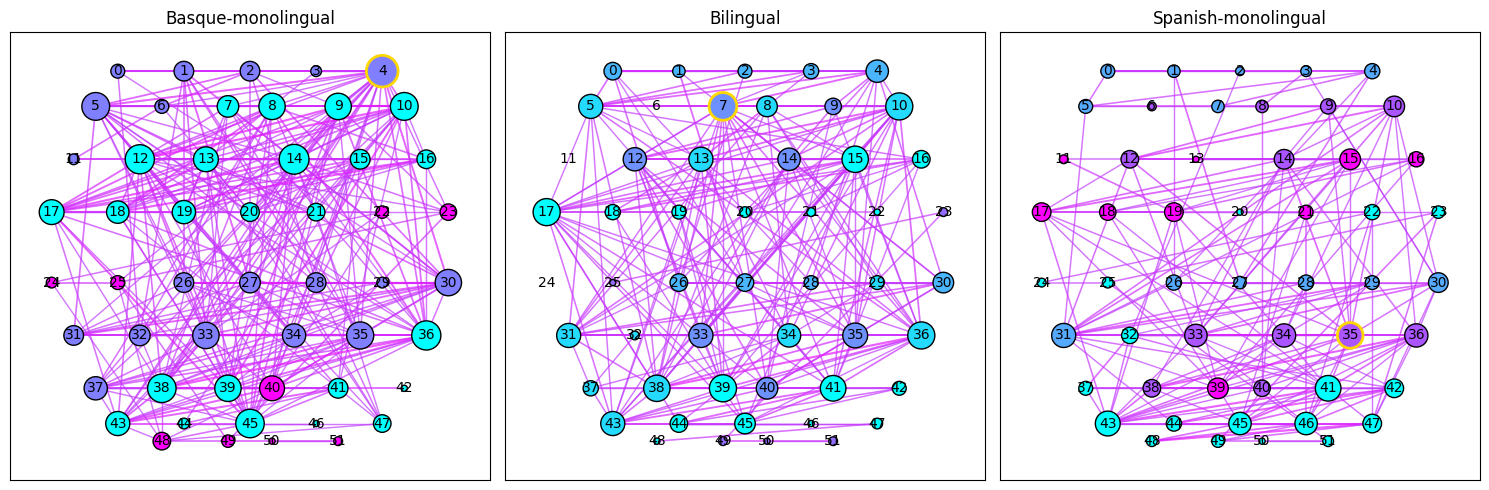

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

grafo_nodirigido(mean_corr_Basque_monolingual, axes[0], coords_10_20, thr=0.5)
axes[0].set_title("Basque-monolingual")

grafo_nodirigido(mean_corr_Bilingual, axes[1], coords_10_20, thr=0.5)
axes[1].set_title("Bilingual")

grafo_nodirigido(mean_corr_Spanish_monolingual, axes[2], coords_10_20, thr=0.5)
axes[2].set_title("Spanish-monolingual")

plt.tight_layout()
plt.show()
